## Lab 13: Linear Regression

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Loading data into pandas DataFrame

In [10]:
startups = pd.read_csv('./50_Startups.csv')
startups.info()
startups.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
#Selecting Features
X = startups['R&D Spend'].values
y = startups['Profit'].values

In [12]:
# X Data
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [13]:
#y Data
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [14]:
X = X.reshape(-1,1)
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [15]:
# Keep Track of our Data
# X feature = Amount spent on research and development
# y = profit
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

In [16]:
print(f"X_train shape [{x_train.shape}")
print(f"y_train shape [{y_train.shape}")
print(f"X_test shape [{x_test.shape}")
print(f"y_test shape [{y_test.shape}")

X_train shape [(40, 1)
y_train shape [(40,)
X_test shape [(10, 1)
y_test shape [(10,)


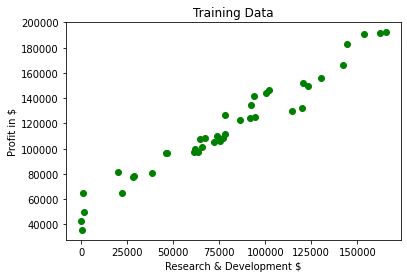

In [18]:
# Plot training Data
plt.scatter(x_train, y_train, color='green')
plt.xlabel('Research & Development $')
plt.ylabel('Profit in $')
plt.title('Training Data')
plt.show()

In [19]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 95.74%
Test Accuracy 89.45%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

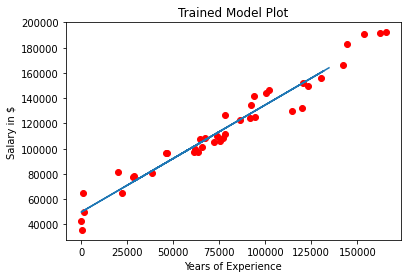

In [20]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $')
plt.title('Trained Model Plot')
plt.plot

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

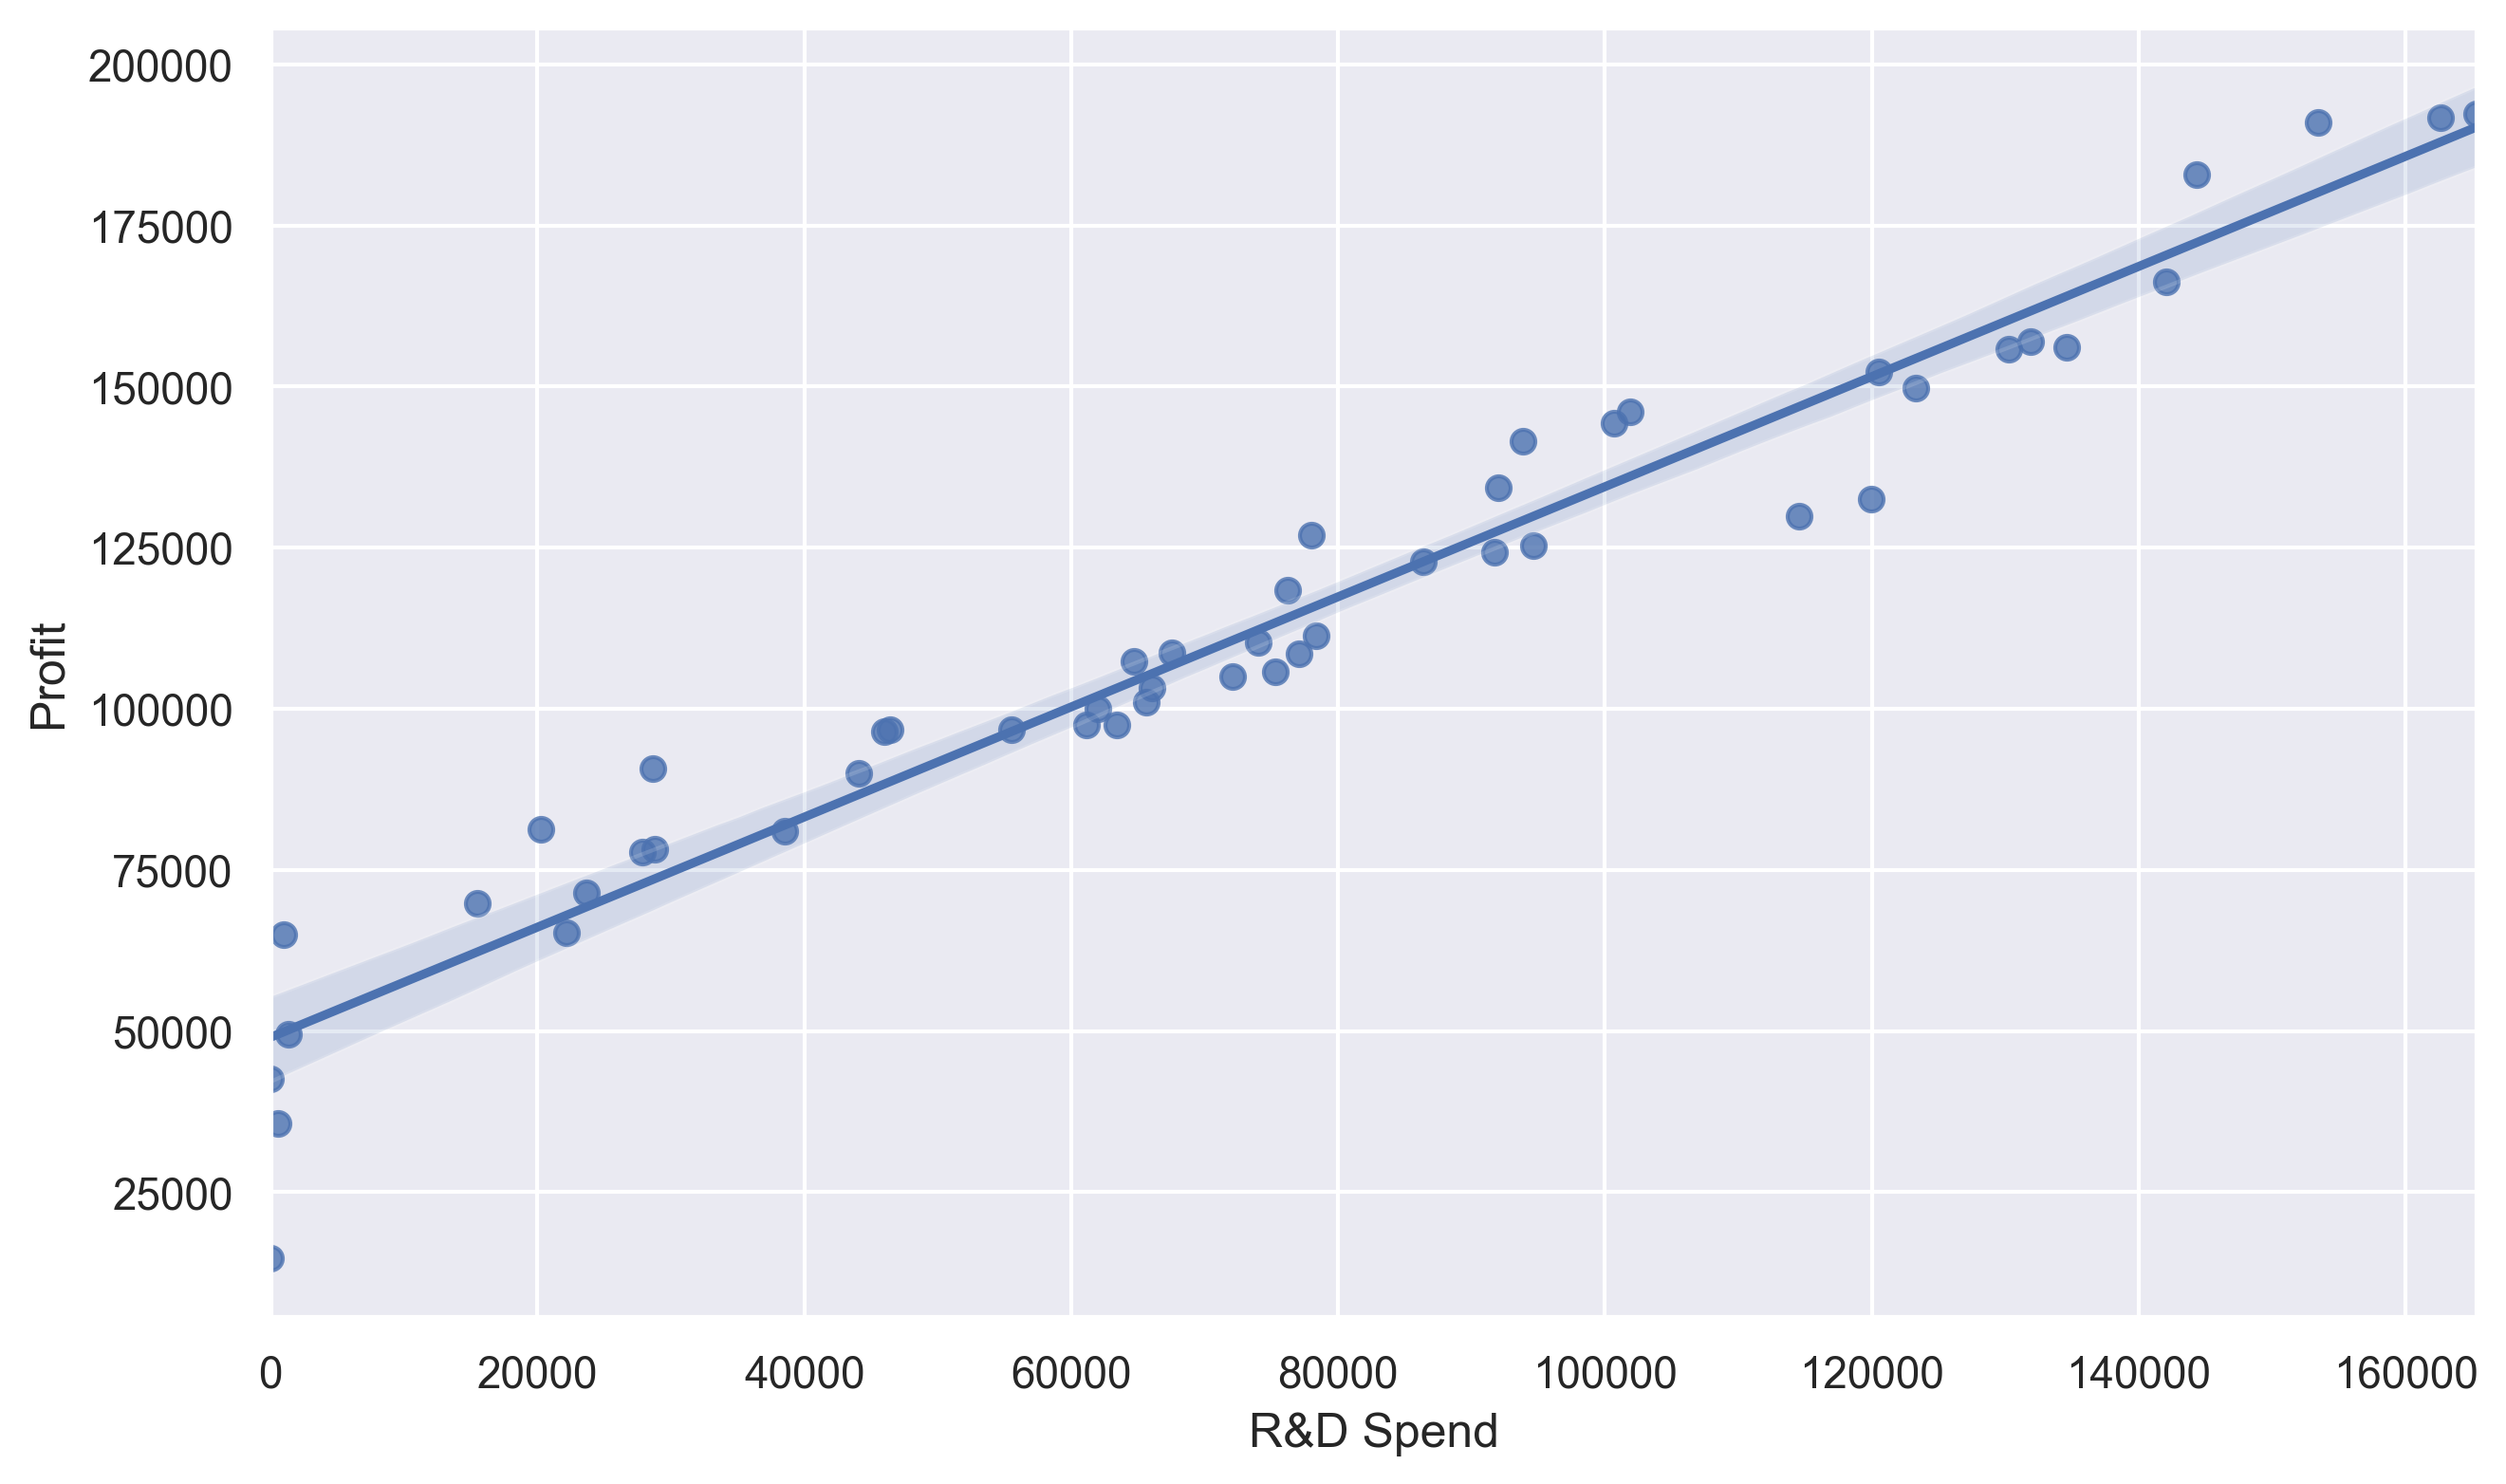

In [25]:
sns.set()
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='R&D Spend', y='Profit', data=startups)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

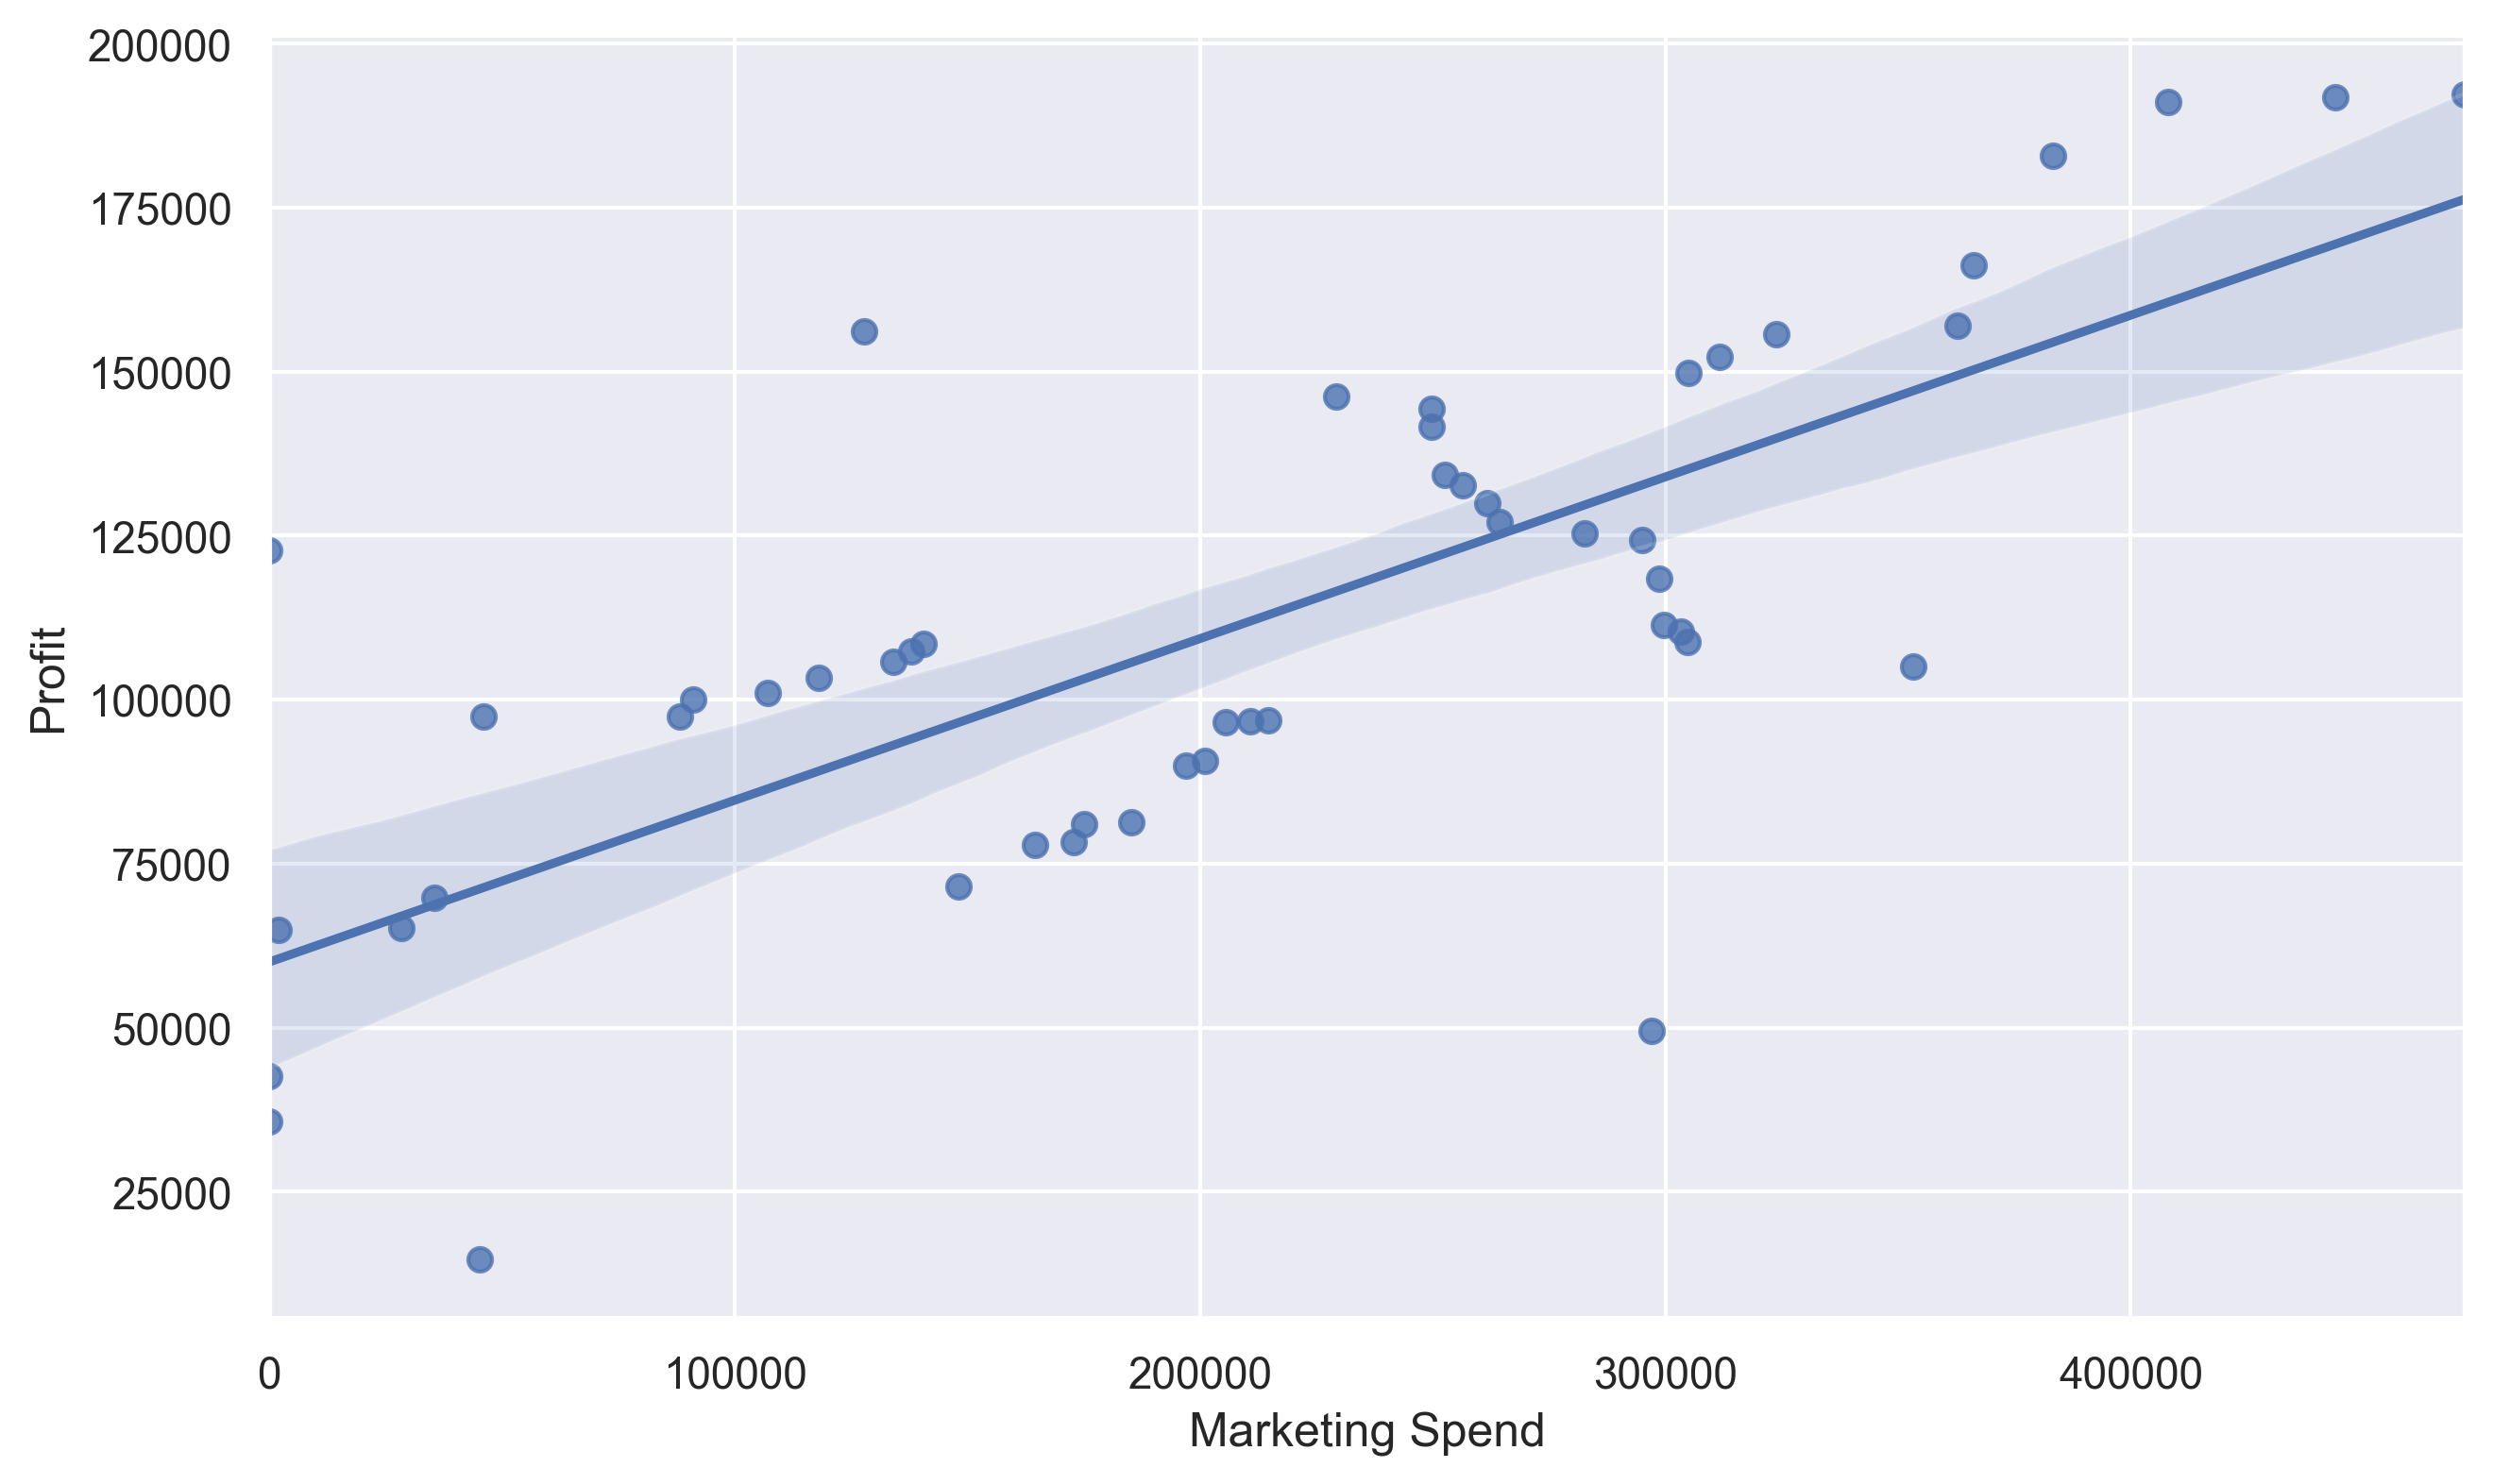

In [27]:
sns.set()
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='Marketing Spend', y='Profit', data=startups)